# Support Vector Machines for Regression

These types of models are known as Support Vector Regression (SVR).

## Simple Linear Regression

### Here the objective is to minimize the sum of squared errors. Take Ordinary Least Squares (OLS) for example. 

where yᵢ is the target, wᵢ is the coefficient, and xᵢ is the predictor (feature)

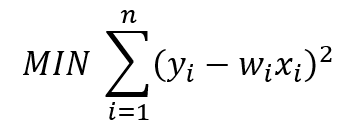

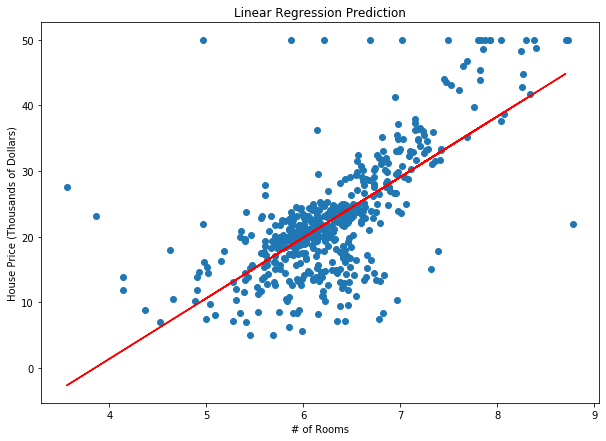

### We are only concerned about reducing error to a certain degree in Linear Regression. We don’t care how large our errors are.

### SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

The objective function of SVR is to minimize the coefficients — not the squared error.

### Minimize:

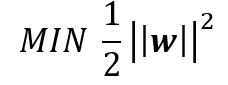

### Error:

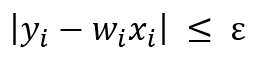

w[i] * x[i] = y_pred and y[i] = actual

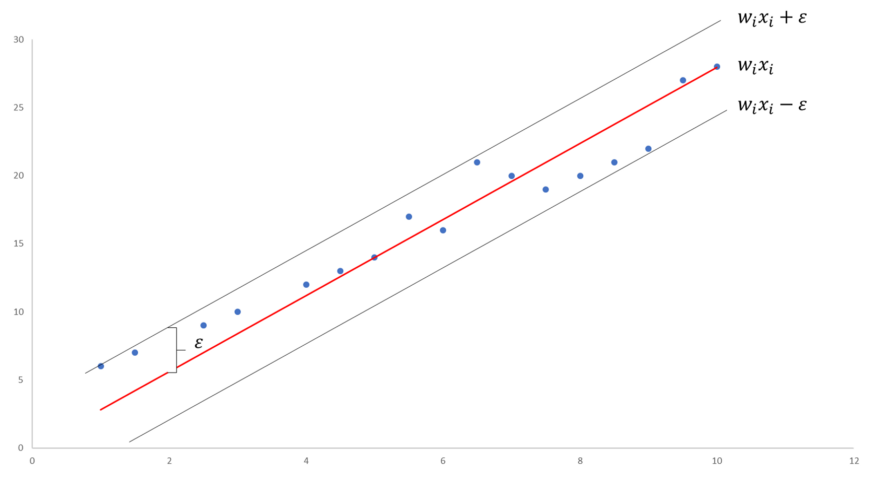

Basic result SVR on Boston dataset example. The red line represents the line of best fit and the black lines represent the margin of error, ϵ. 

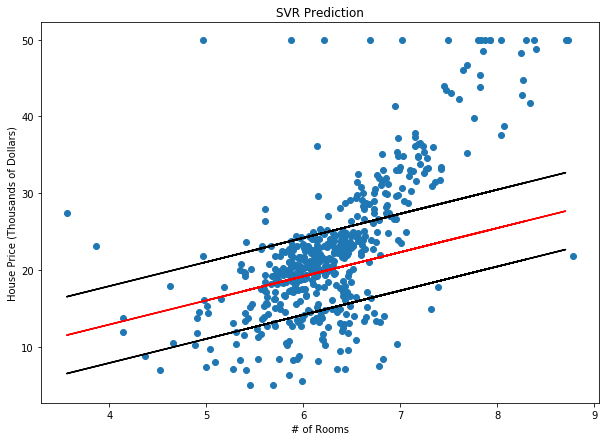

This algorithm doesn’t work for all data points. The algorithm solved the objective function as best as possible but some of the points still fall outside the margins. As such, we need to account for the possibility of errors that are larger than ϵ. We can do this with another hyperparameter.

### for any value that falls outside of ϵ, we can denote its difference from the margin as ξ.

### Minimize:

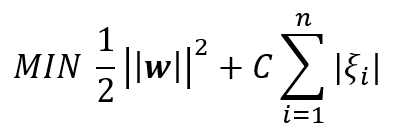

### Error:

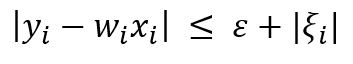

### Example:

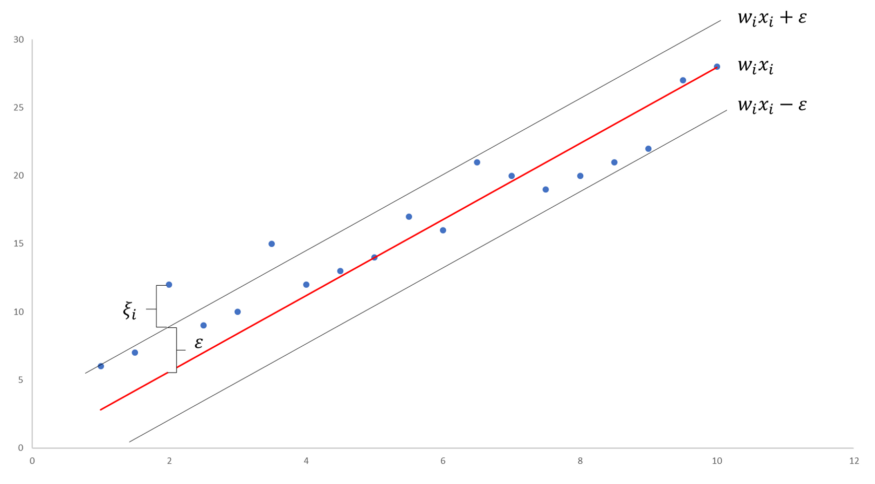

### We will call this error hyperparameter ξ as C. 

### As C increases, our limit for points outside of ϵ also increases. As C approaches 0, the limit approaches 0 .

If we set C=1.0 The results will below. We can see better affection of C to our model.

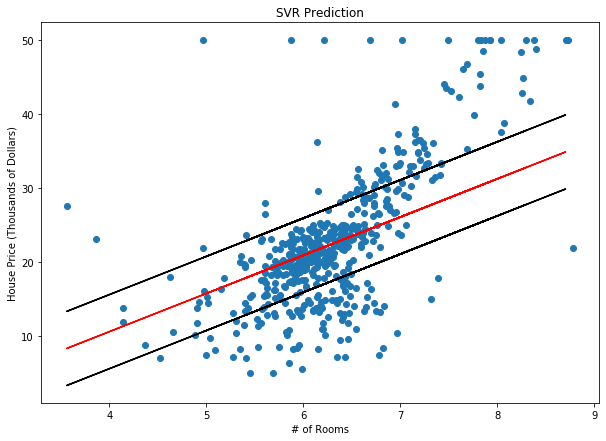

Lets make C=6 then result will be:

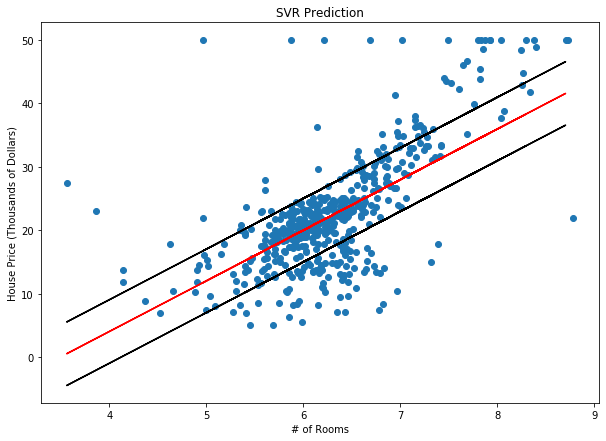

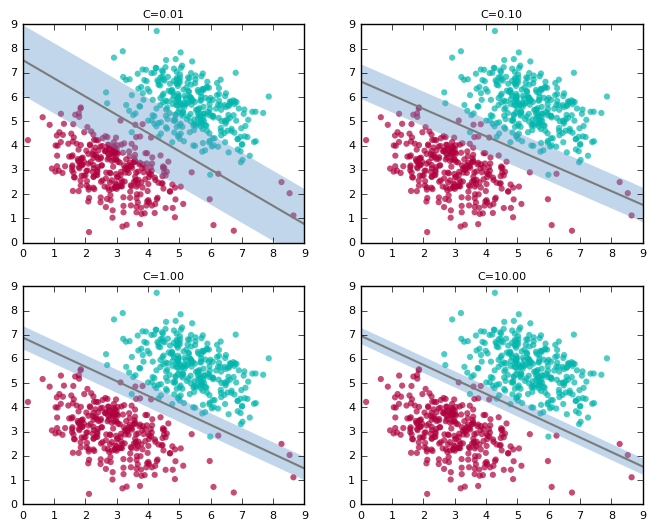

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

## Real estate data with different features

In [41]:
data = pd.read_csv(r'Real estate.csv')
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.9170,32.0000,84.8788,10,24.9830,121.5402,37.9000
1,2,2012.9170,19.5000,306.5947,9,24.9803,121.5395,42.2000
2,3,2013.5830,13.3000,561.9845,5,24.9875,121.5439,47.3000
3,4,2013.5000,13.3000,561.9845,5,24.9875,121.5439,54.8000
4,5,2012.8330,5.0000,390.5684,5,24.9794,121.5425,43.1000
...,...,...,...,...,...,...,...,...
409,410,2013.0000,13.7000,4082.0150,0,24.9415,121.5038,15.4000
410,411,2012.6670,5.6000,90.4561,9,24.9743,121.5431,50.0000
411,412,2013.2500,18.8000,390.9696,7,24.9792,121.5399,40.6000
412,413,2013.0000,8.1000,104.8101,5,24.9667,121.5407,52.5000


In [42]:
data.describe(include='all')

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.0000,414.0000,414.0000,414.0000,414.0000,414.0000,414.0000,414.0000
mean,207.5000,2013.1490,17.7126,1083.8857,4.0942,24.9690,121.5334,37.9802
std,119.6558,0.2820,11.3925,1262.1096,2.9456,0.0124,0.0153,13.6065
min,1.0000,2012.6670,0.0000,23.3828,0.0000,24.9321,121.4735,7.6000
25%,104.2500,2012.9170,9.0250,289.3248,1.0000,24.9630,121.5281,27.7000
50%,207.5000,2013.1670,16.1000,492.2313,4.0000,24.9711,121.5386,38.4500
75%,310.7500,2013.4170,28.1500,1454.2790,6.0000,24.9775,121.5433,46.6000
max,414.0000,2013.5830,43.8000,6488.0210,10.0000,25.0146,121.5663,117.5000


In [43]:
data.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [44]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [45]:
data.drop('No', axis=1, inplace=True)

In [46]:
targets = data['Y house price of unit area']

inputs = data.drop('Y house price of unit area', axis=1)

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [48]:
from sklearn import metrics

def evaluate(model, x_test, y_test):
    
    y_pred = model.predict(x_test)
    
    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = metrics.r2_score(y_test, y_pred)


    y_pred_train = model.predict(x_train)

    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)


    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)

## SVR by default

In [16]:
from sklearn.svm import SVR

base_model = SVR()
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

  Metric      Train       Test
0    MAE   6.741966   6.300160
1    MSE  98.775921  67.221189
2   RMSE   9.938608   8.198853
3     R2  47.484897  59.930084


## SVR with parameter tuning

# Randomized Search

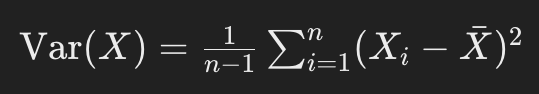

In [32]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
# kernel trick

gamma = ['scale', 'auto']
#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma
#if ‘auto’, uses 1 / n_features.

C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]
# Must be strictly positive.

epsilon = [0.1 , 0.01, 0.001, 0.0001]


# Create the random grid
random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C,
               'epsilon': epsilon}
print(random_grid)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0], 'epsilon': [0.1, 0.01, 0.001, 0.0001]}


In [33]:
svr_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=1, n_jobs = -1)
# Fit the random search model
svr_random.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000.0, 10000.0,
                                              100000.0, 1000000.0],
                                        'epsilon': [0.1, 0.01, 0.001, 0.0001],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=1)

In [41]:
svr_random.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.1, 'C': 1000000.0}

In [42]:
optimized_model = svr_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, x_test, y_test)

  Metric               Train                Test
0    MAE        1598866.0274        1722993.6835
1    MSE  6162360281816.0938  6717380015350.1230
2   RMSE        2482410.1760        2591790.8896
3     R2 -3276274028213.8975 -4004166812719.2056


# Optuna Search

In [17]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import cross_val_score
import optuna

def best_params_for_model(trial):

    param = {
        'C': trial.suggest_loguniform('C', 0.1, 10),  # Regularization parameter
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),  # Kernel type
        'degree': trial.suggest_int('degree', 2, 5),  # Degree for polynomial kernel
        'gamma': trial.suggest_categorical('gamma', ['auto', 'scale']),  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
        'epsilon': trial.suggest_loguniform('epsilon', 0.01, 1.0)  # Epsilon in the epsilon-SVR model
    }

    svr = SVR(**param)

    score = cross_val_score(svr, x_train, y_train, cv=3, scoring='r2', n_jobs=-1).mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)


In [33]:
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train, y_train)

evaluate(best_svr_model, x_test, y_test)

  Metric   Train    Test
0    MAE  6.6354  5.4685
1    MSE 91.0960 59.2760
2   RMSE  9.5444  7.6991
3     R2 51.5680 64.6661


# Univariate Analysis

In [34]:
 variables = []
train_r2_scores = []
test_r2_scores = []

for i in x_train.columns: 
    X_train_single_var = x_train[[i]]
    X_test_single_var = x_test[[i]]

    best_svr_model.fit(X_train_single_var, y_train)
    y_pred_train_single_var = best_svr_model.predict(X_train_single_var)

    train_r2 = metrics.r2_score(y_train, y_pred_train_single_var)

    y_pred_test_single_var = best_svr_model.predict(X_test_single_var)

    test_r2 = metrics.r2_score(y_test, y_pred_test_single_var)

    variables.append(i)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

results_df = pd.DataFrame({'Variable': variables, 'Train R2': train_r2_scores, 'Test R2': test_r2_scores})

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


,Variable,Train R2,Test R2
2,X3 distance to the nearest MRT station,0.4256,0.5504
3,X4 number of convenience stores,0.2871,0.4071
1,X2 house age,0.0334,-0.0255
5,X6 longitude,0.0012,-0.0435
4,X5 latitude,0.0003,-0.0468
0,X1 transaction date,-0.2324,-0.1255


# Final Inputs

In [35]:
fin_inputs = data[['X3 distance to the nearest MRT station','X4 number of convenience stores']]

x_train, x_test, y_train, y_test = train_test_split(fin_inputs, targets, test_size=0.2, random_state=42)

In [36]:
best_svr_model.fit(x_train, y_train)

evaluate(best_svr_model, x_test, y_test)

  Metric    Train    Test
0    MAE   7.2263  6.6145
1    MSE 108.7078 73.5687
2   RMSE  10.4263  8.5772
3     R2  42.2045 56.1464
